# TODO: Import the required libraries

In [ ]:
# TODO
import os
import numpy as np
import tensorflow as tf
import random
from google.colab import drive
import re
drive.mount('/content/drive')
path = '/content/drive/MyDrive/alice.txt'
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Adding random seed

In [ ]:
# Set environment variables
os.environ['PYTHONHASHSEED'] = str(25)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Set seed values
np.random.seed(25)
tf.random.set_seed(25)
random.seed(25)

# TODO: Read and Preprocess the dataset

In [ ]:
with open(path, 'r', encoding='utf-8') as file:
    text = file.read()
# Convert to lowercase
text = text.lower()
# Remove punctuation and special characters
text = re.sub(r'[^\w\s]', '', text)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(len(text))

140269


# TODO: Using tokenizers

In [ ]:
# TODO: Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

# Calculate the total number of unique words
total_words = len(tokenizer.word_index) + 1  # Adding 1 to account for the tokenizer's indexing method

# Print the total number of words
print(f"Total number of unique words: {total_words}")

Total number of unique words: 2751


In [ ]:
print(total_words)

2751


# TODO: Feature Engineering

In [ ]:
lines = text.split('\n')
# TODO: Create input sequences
input_sequences = []
for line in lines:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list) + 1):
        n_gram_sequence = token_list[:i]
        input_sequences.append(n_gram_sequence)

# Identify the maximum sequence length
max_sequence_len = max([len(seq) for seq in input_sequences])

# Pad sequences
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Print the number of input sequences
print(f"Number of input sequences: {len(input_sequences)}")


Number of input sequences: 26410


In [ ]:
print(len(input_sequences))

26410


# TODO: Storing features and labels

In [ ]:
# TODO: Create predictors and labels
input_sequences = np.array(input_sequences)
X, y = input_sequences[:, :-1], input_sequences[:, -1]

# Convert labels to one-hot encoded vectors
y = tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index) + 1)

# TODO: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=25)

# Print the size of the train and validation subsets
print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

Training features shape: (21128, 15)
Validation features shape: (5282, 15)
Training labels shape: (21128, 2751)
Validation labels shape: (5282, 2751)


# TODO: Building our model

In [ ]:
# TODO: Build your model
# Define the model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           275100    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 2751)              415401    
                                                                 
Total params: 841101 (3.21 MB)
Trainable params: 841101 (3.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# TODO: Model training

In [ ]:
# TODO: Train your model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
661/661 [==============================] - 55s 78ms/step - loss: 6.2359 - accuracy: 0.0615 - val_loss: 6.0777 - val_accuracy: 0.0644
Epoch 2/20
661/661 [==============================] - 33s 50ms/step - loss: 5.8140 - accuracy: 0.0723 - val_loss: 5.9046 - val_accuracy: 0.0850
Epoch 3/20
661/661 [==============================] - 34s 51ms/step - loss: 5.5150 - accuracy: 0.0956 - val_loss: 5.7807 - val_accuracy: 0.0977
Epoch 4/20
661/661 [==============================] - 36s 55ms/step - loss: 5.2178 - accuracy: 0.1199 - val_loss: 5.6905 - val_accuracy: 0.1144
Epoch 5/20
661/661 [==============================] - 36s 55ms/step - loss: 4.9420 - accuracy: 0.1398 - val_loss: 5.6589 - val_accuracy: 0.1204
Epoch 6/20
661/661 [==============================] - 33s 50ms/step - loss: 4.6945 - accuracy: 0.1550 - val_loss: 5.6633 - val_accuracy: 0.1250
Epoch 7/20
661/661 [==============================] - 33s 50ms/step - loss: 4.4684 - accuracy: 0.1728 - val_loss: 5.6956 - val_accuracy:

# TODO: Visualising the Training and Validation Accuracies and Losses against the number of Epochs

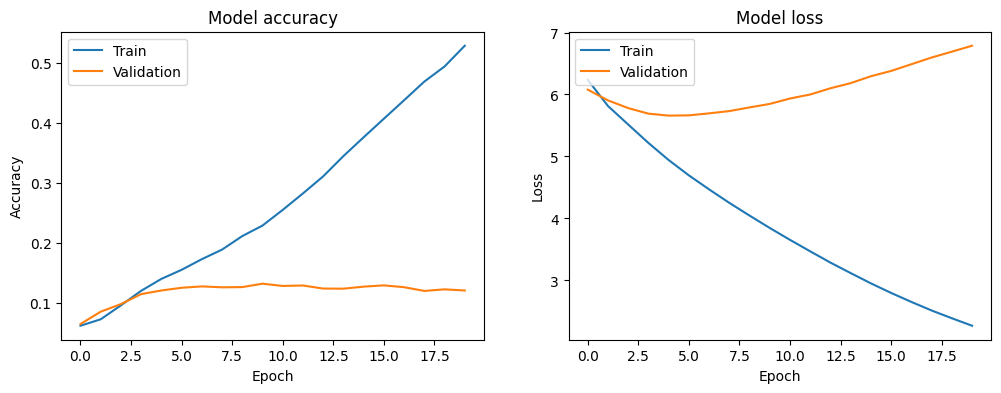

In [ ]:
# TODO: Plotting the training and validation loss and accuracy
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_history(history)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 15, 100)           275100    
                                                                 
 bidirectional_2 (Bidirecti  (None, 15, 300)           301200    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 15, 300)           0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 300)               541200    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 300)               0     

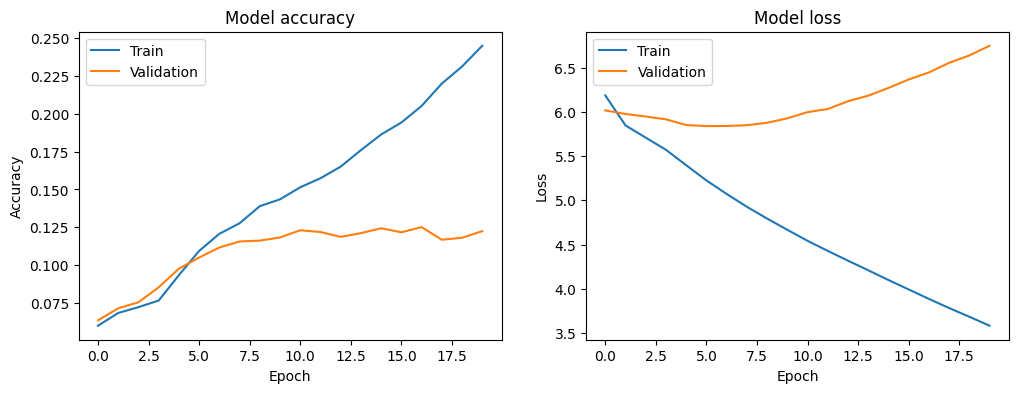

In [ ]:
# My own Bidirectional Model with dropout layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout

def create_bidirectional_lstm_model(max_sequence_len, total_words):
    # Input layer
    inputs = Input(shape=(max_sequence_len-1,))

    # Embedding layer
    embedding = Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len-1)(inputs)

    # Bidirectional LSTM layers
    bilstm1 = Bidirectional(LSTM(150, return_sequences=True))(embedding)
    dropout1 = Dropout(0.2)(bilstm1)

    bilstm2 = Bidirectional(LSTM(150))(dropout1)
    dropout2 = Dropout(0.2)(bilstm2)

    # Output layer
    outputs = Dense(total_words, activation='softmax')(dropout2)

    # Create and compile model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Create the Bidirectional LSTM model
bidirectional_model = create_bidirectional_lstm_model(max_sequence_len, total_words)

# Print the model summary
bidirectional_model.summary()

# Train the model
bidirectional_history = bidirectional_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

# Plot the training history
plot_history(bidirectional_history)

# TODO: Generate text

In [ ]:
# TODO: Function to generate text
def generate_text(model, tokenizer, seed_text, next_words, max_sequence_len, temperature=1.0):
    result = seed_text
    for _ in range(next_words):
        # Tokenize the current text
        token_list = tokenizer.texts_to_sequences([result])[0]
        # Pad the tokenized text to the required sequence length
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        # Predict the logits for the next word
        predictions = model.predict(token_list, verbose=0)
        # Adjust the logits by the temperature parameter
        predictions = np.asarray(predictions).astype('float64')
        predictions = np.log(predictions + 1e-7) / temperature
        exp_preds = np.exp(predictions)
        predictions = exp_preds / np.sum(exp_preds)
        # Sample the next word's index based on these probabilities
        probas = np.random.multinomial(1, predictions[0], 1)
        next_index = np.argmax(probas)
        # Map the index back to the corresponding word using the tokenizer
        next_word = tokenizer.index_word[next_index]
        # Append the word to the current text
        result += " " + next_word
    return result
seed_text = "Forest is"
next_words = 10

# Generate text with temperature 0.05
generated_text_low_temp = generate_text(model, tokenizer, seed_text, next_words, max_sequence_len, temperature=0.05)
print(f"Generated text with temperature 0.05: {generated_text_low_temp}")

# Generate text with temperature 1.5
generated_text_high_temp = generate_text(model, tokenizer, seed_text, next_words, max_sequence_len, temperature=1.5)
print(f"Generated text with temperature 1.5: {generated_text_high_temp}")


Generated text with temperature 0.05: Forest is that the poor little thing sobbed again or twice at
Generated text with temperature 1.5: Forest is but it ran one again again five angrily bats so
